
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [1]:
# I'm running this locally, files stored here
%cd LoL_project

C:\Users\thedo\LoL_project


In [0]:
# Import my own data (test is in another file)
import pandas as pd
train = pd.read_csv('LoL_train_cleaned.csv', index_col=0)
val = pd.read_csv('LoL_val_cleaned.csv', index_col=0)
champ_stats = pd.read_csv('champ_stats.csv', index_col=0)

In [3]:
print(train.shape)
train.head()

(36043, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
22656,3214824413,0,1274,9,2,2,2,2,0,2,...,10,2,0,2,1,Katarina,Yasuo,Lucian,Zac,Darius
17347,3214843995,2392998,2033,9,1,2,1,1,2,1,...,6,0,1,3,1,Zac,Camille,Galio,Draven,Xayah
9978,3214825708,3633614,2087,9,1,2,2,1,1,2,...,4,0,0,2,1,Vladimir,Ivern,Galio,Fizz,Fiora
34410,3214844763,4917497,2323,9,1,1,2,1,2,2,...,3,0,1,2,0,Zac,Fiora,Yasuo,Lulu,Fizz
10658,3214864950,6643444,1613,9,2,1,1,2,2,1,...,6,1,1,1,0,Zyra,Kassadin,Xayah,Katarina,Ivern


In [4]:
champ_stats.head()

,pick_count,ban_count,pick_rate,ban_rate,win_rate,dragon_kill_rate,baron_kill_rate
name,,,,,,,
Tristana,10982,10247,0.250925,0.234132,0.515025,1.398106,0.410126
Thresh,11197,5014,0.255838,0.114564,0.472895,1.401000,0.398857
Vayne,8916,7410,0.203720,0.169310,0.514581,1.369897,0.407470
Kayn,8204,14601,0.187451,0.333615,0.485982,1.281326,0.352511
Lee Sin,7929,5570,0.181168,0.127268,0.525918,1.460840,0.391222


## Continue to iterate on your project

I have two ideas for today: one is another feature engineering idea, the other involves encoding.  They're both related in a way, so they may become redundant.

In [5]:
# They involve ranking champions by some of their stats, so let's do that.

# Sorting by pick_rate
top_picks = champ_stats.sort_values('pick_rate', ascending=False)[['pick_rate']]
top_picks.head()

,pick_rate
name,
Thresh,0.255838
Tristana,0.250925
Vayne,0.203720
Kayn,0.187451
Lee Sin,0.181168


In [0]:
# Do the same for ban_rate and win_rate
top_bans = champ_stats.sort_values('ban_rate', ascending=False)[['ban_rate']]
top_wins = champ_stats.sort_values('win_rate', ascending=False)[['win_rate']]

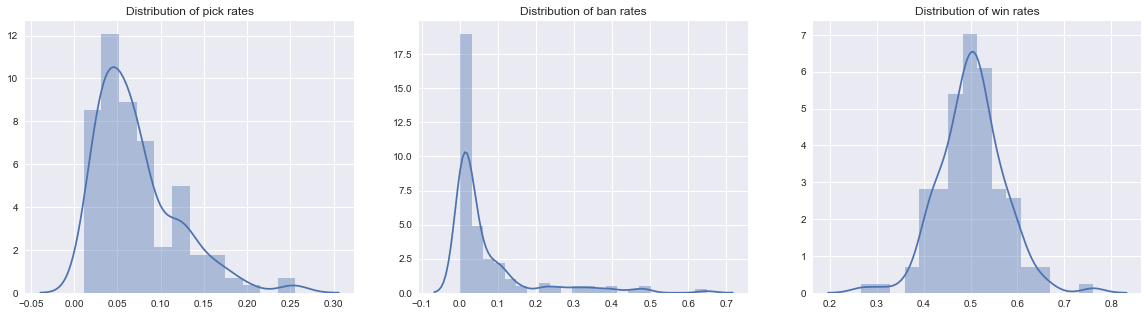

In [11]:
# Visualizing these
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20,5)

sns.distplot(top_picks, ax=ax[0])
ax[0].set_title('Distribution of pick rates')

sns.distplot(top_bans, ax=ax[1])
ax[1].set_title('Distribution of ban rates')

sns.distplot(top_wins, ax=ax[2])
ax[2].set_title('Distribution of win rates');

As I thought, win rates are pretty evenly distributed just like the rest of what I've looked at so far.  Pick and Ban rates are skewed though, I might be able to do something with that.

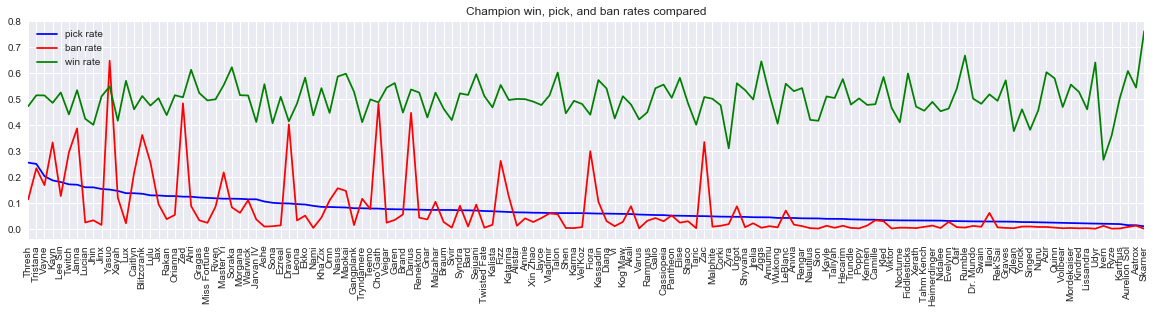

In [41]:
# Another way to visualize them
combined = top_picks.merge(top_bans, left_index=True, right_index=True)
combined = combined.merge(top_wins, left_index=True, right_index=True)

plt.figure(figsize=(20,4))
plt.plot(combined.index, combined['pick_rate'], color='b', label='pick rate')
plt.plot(combined.index, combined['ban_rate'], color='r', label='ban rate')
plt.plot(combined.index, combined['win_rate'], color='g', label='win rate')
plt.legend()
plt.title('Champion win, pick, and ban rates compared')
plt.xticks(rotation=90)
plt.margins(x=0);

And through this visualization we can see that they are not completely correlated.  Win rate doesn't really trend anywhere, while pick and ban rate are somewhat related but still with a lot of variation.

This makes sense when you consider the game rules:  if a champion is banned, then they cannot be picked.  Therefore the ones with the highest ban rates (that players don't want to fight against) are picked less often because players just aren't allowed to.  But when those champions aren't banned, they're more likely to be picked.

There is an interesting outlier in that the champion with the highest win rate also has some of the lowest pick and ban rates.  Perhaps it is just a very difficult one to use.

In [44]:
champ_stats.sort_values('pick_rate', ascending=False)[:10].index

Index(['Thresh', 'Tristana', 'Vayne', 'Kayn', 'Lee Sin', 'Twitch', 'Janna',
       'Lucian', 'Jhin', 'Jinx'],
      dtype='object', name='name')

In [0]:
# My feature engineering code
# Since this has to calculate some things by individual rows, 
# it might take a bit to run

# Get lists of top 10 champions
# I realize I didn't need to calculate this the way I did above
top_picks = champ_stats.sort_values('pick_rate', ascending=False)[:10].index
top_bans = champ_stats.sort_values('ban_rate', ascending=False)[:10].index

# helper
def count_commons(a, b): 
  """ returns the number of common values between arrays a & b """
  return len(set(a) & set(b))

def engineer_features(X):
  """ returns X with new engineered features """
  X = X.copy()

  # calculating 8 new columns for each row:
  new_col = [.0] * len(X) # initialize with floats

  # average win rate for champs on each team (mean of win rates)
  X['t1_avg_win_rate'] = new_col
  X['t2_avg_win_rate'] = new_col

  # average ban rate for champs on each team 
  # (this is particularly interesting, since it tells how often 
  # the champs picked in this game were banned in others)
  X['t1_avg_ban_rate'] = new_col
  X['t2_avg_ban_rate'] = new_col

  # average kill rates for each team's champs of each monster
  X['t1_avg_dragon_kills'] = new_col
  X['t2_avg_dragon_kills'] = new_col
  X['t1_avg_baron_kills'] = new_col
  X['t2_avg_baron_kills'] = new_col

  # number of top 10 champs on each team
  new_col = [0] * len(X) # these columns will be integer types
  X['t1_top_picks'] = new_col
  X['t2_top_picks'] = new_col
  X['t1_top_bans'] = new_col
  X['t2_top_bans'] = new_col

  for i in X.index:
    # extract team lists
    team1 = X.loc[i][['t1_champ1id', 't1_champ2id', 't1_champ3id', 
                      't1_champ4id', 't1_champ5id']]
    team2 = X.loc[i][['t2_champ1id', 't2_champ2id', 't2_champ3id', 
                      't2_champ4id', 't2_champ5id']]

    # average stats of the 5 champs on each team
    t1_stats = champ_stats.loc[team1].mean()
    X.at[i, 't1_avg_win_rate'] = t1_stats['win_rate']
    X.at[i, 't1_avg_ban_rate'] = t1_stats['ban_rate']
    X.at[i, 't1_avg_dragon_kills'] = t1_stats['dragon_kill_rate']
    X.at[i, 't1_avg_baron_kills'] = t1_stats['baron_kill_rate']

    t2_stats = champ_stats.loc[team2].mean()
    X.at[i, 't2_avg_win_rate'] = t2_stats['win_rate']
    X.at[i, 't2_avg_ban_rate'] = t2_stats['ban_rate']
    X.at[i, 't2_avg_dragon_kills'] = t2_stats['dragon_kill_rate']
    X.at[i, 't2_avg_baron_kills'] = t2_stats['baron_kill_rate']

    # count number of top champs
    X.at[i, 't1_top_picks'] = count_commons(team1, top_picks)
    X.at[i, 't2_top_picks'] = count_commons(team2, top_picks)
    X.at[i, 't1_top_bans'] = count_commons(team1, top_bans)
    X.at[i, 't2_top_bans'] = count_commons(team2, top_bans)


  # Also find the difference between those average rates
  X['win_rate_diff'] = X['t1_avg_win_rate'] - X['t2_avg_win_rate']
  X['ban_rate_diff'] = X['t1_avg_ban_rate'] - X['t2_avg_ban_rate']
  X['dragon_diff'] = X['t1_avg_dragon_kills'] - X['t2_avg_dragon_kills']
  X['baron_diff'] = X['t1_avg_baron_kills'] - X['t2_avg_baron_kills']

  return X

In [73]:
team1 = train.iloc[4][['t1_champ1id', 't1_champ2id', 't1_champ3id', 
                      't1_champ4id', 't1_champ5id']]
team1

t1_champ1id      Jhin
t1_champ2id     Yasuo
t1_champ3id    Twitch
t1_champ4id    Darius
t1_champ5id    Thresh
Name: 10658, dtype: object

In [76]:
%%time
# apply feature engineering
train = engineer_features(train)
val = engineer_features(val)

Wall time: 2min 15s


In [77]:
# view just the new engineered columns I added today
train[train.columns[-8:-4]].head()

,t1_top_picks,t2_top_picks,t1_top_bans,t2_top_bans
22656,1,2,2,0
17347,2,0,0,0
9978,0,3,0,0
34410,0,2,1,0
10658,3,1,2,1


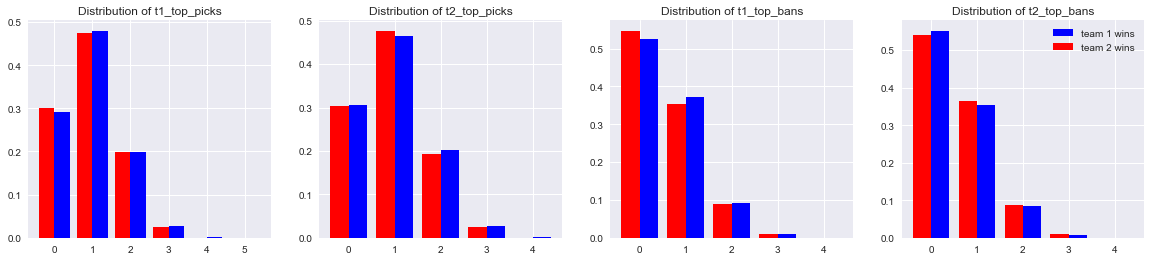

In [99]:
# A visual method to see how my new columns are distributed on the target
wins1 = train[train['winner'] == 1]
wins2 = train[train['winner'] == 2]

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(20,4)

cols = ['t1_top_picks', 't2_top_picks', 't1_top_bans', 't2_top_bans']
for i in range(4):
  val1 = wins1[cols[i]].value_counts(normalize=True)
  ax[i].bar(x=val1.index+.2, height=val1, width=.4, 
            color='b', label='team 1 wins')
  
  val2 = wins2[cols[i]].value_counts(normalize=True)
  ax[i].bar(x=val2.index-.2, height=val2, width=.4, 
            color='r', label='team 2 wins')
  ax[i].set_title('Distribution of ' + cols[i])

plt.legend();

Ugh, still almost no variation in these values between one team winning or the other.  I'm not sure this will help my model either, but let's try it out anyway.

In [101]:
# Select features to use
target = 'winner'
columns = train.columns
champs_used = columns[columns.str.contains('id')].tolist()
champs_banned = (columns[columns.str.contains('t1_ban')].tolist() +
                 columns[columns.str.contains('t2_ban')].tolist())
spells_used = columns[columns.str.contains('sum')].tolist()
engineered = columns[-16:].tolist()

# Using all available pre-match data plus my engineered features (should be 56)
features = champs_used + champs_banned + spells_used + engineered
print('Number of features selected:', len(features))

Number of features selected: 56


In [0]:
# Split into X and y variables
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [106]:
# I'll go back to XGBoost for the moment
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(max_depth=6, n_estimators=200)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.5137899779878285


Hm, no improvement over the XGBoost model I used yesterday.  I'll put that aside for now though, and go into the actual assignment goals.

## Partial Dependence Plots

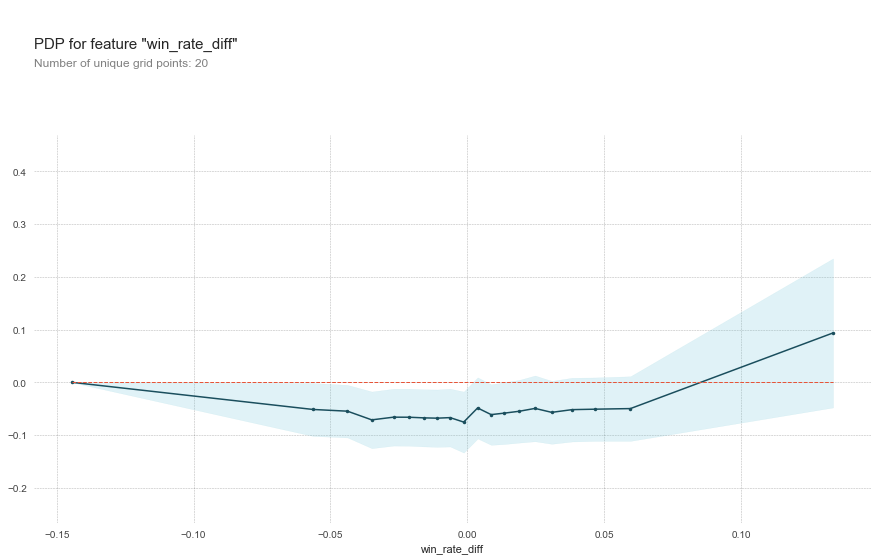

In [112]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# Starting with a 1 feature plot
feature = 'win_rate_diff'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=20
)

pdp_plot(isolated, feature_name=feature);

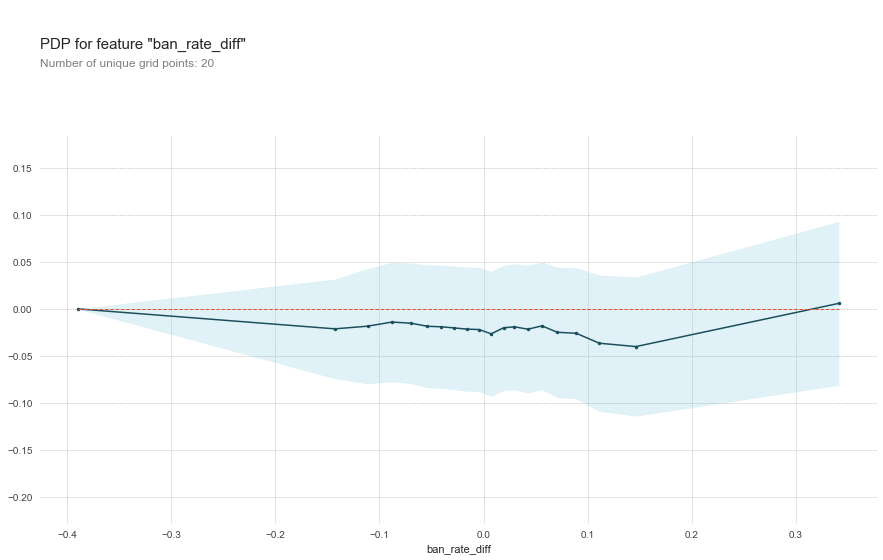

In [113]:
# Trying another feature
feature = 'ban_rate_diff'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature,
    num_grid_points=20
)

pdp_plot(isolated, feature_name=feature);

Since y=0 is the threshold for classification, It would have been nicer to see a consistent slope on these PDP graphs.  Unfortunately, I don't seem to be getting that.

The actual columns 'win_rate_diff' and 'ban_rate_diff' are the differences in the average win rates and ban rates of the 5 champions on each team.  The idea with those columns was that if one team chooses champions that win matches more often (or get banned by the other team more often), then that team might have a higher chance of winning the match.  Unfortunately, that doesn't seem to be the case.

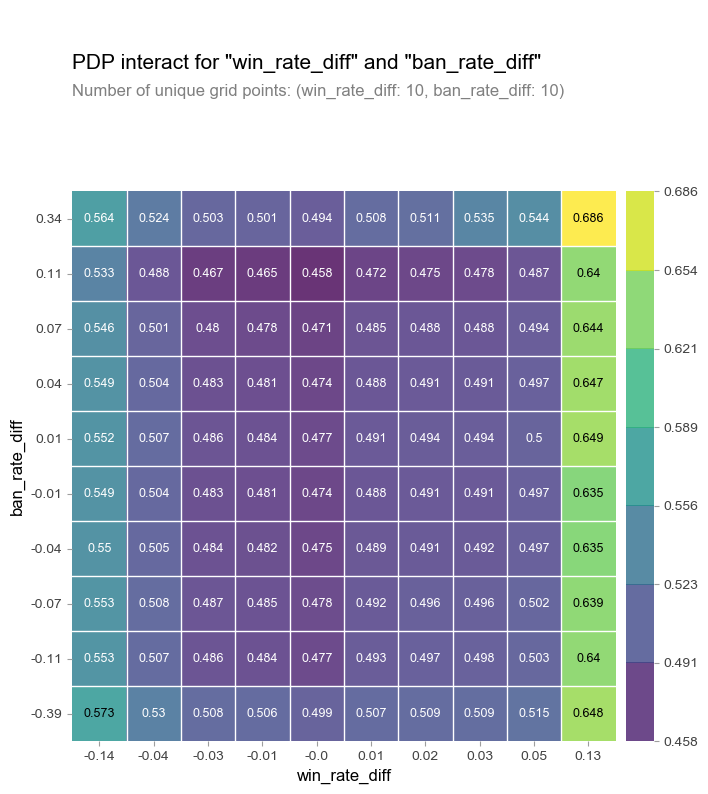

In [115]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# 2 feature plot, with those two together
features = ['win_rate_diff', 'ban_rate_diff']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    features=features,
)

plt.style.use('default') # the seaborn style from earlier messes up this graph
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

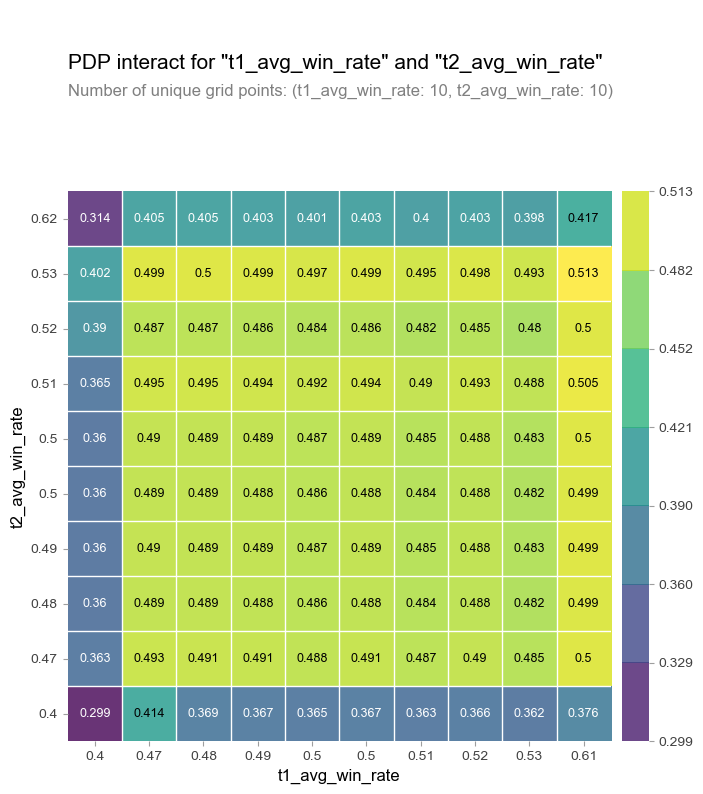

In [116]:
# again with other features
features = ['t1_avg_win_rate', 't2_avg_win_rate']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    features=features,
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

## Shapely Values and Force Plots

(and also my first attempt at hyperparameter optimization and cross-validation with this project)

In [0]:
# Since I'm usting cross-validation, I'll need to combine train and val
train_combined = train.append(val)

# I overrode this variable when I did the 2 feature PDP graphs, change it back
features = champs_used + champs_banned + spells_used + engineered

X_train = train_combined[features]
y_train = train_combined[target]

In [119]:
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(random_state=42, n_jobs=-3)
)

param_distributions = { 
    'randomforestclassifier__n_estimators': range(50, 251, 50), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-3, 
    random_state=42
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-3)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-3)]: Done  12 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-3)]: Done  21 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-3)]: Done  30 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-3)]: Done  37 out of  50 | elapsed:  6.3min remaining:  2.2min
[Parallel(n_jobs=-3)]: Done  43 out of  50 | elapsed:  6.9min remaining:  1.1min
[Parallel(n_jobs=-3)]: Done  50 out of  50 | elapsed:  7.3min finished


In [120]:
# View the best model found
print('Best hyperparameters:', search.best_params_)
print('Cross-validation score:', search.best_score_)

Best hyperparameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.3042422429595377, 'randomforestclassifier__n_estimators': 250}
Cross-validation score: 0.5272585859201222


In [126]:
# Now to actually get a Shapley plot
import shap

# shap doesn't work directly with pipelines, and needs features to be numeric.
# so I encode the sample row first, before passing it to the TreeExplainer
model = search.best_estimator_.named_steps['randomforestclassifier']
encoder = search.best_estimator_.named_steps['ordinalencoder']
row = X_val.sample(n=1) # a random samle row
row_encoded = encoder.transform(row)

explainer = shap.TreeExplainer(model)
explainer.shap_values(row_encoded)

[array([[-3.46261875e-04, -4.85217565e-04,  7.24221735e-05,
          8.36718945e-05, -1.41438006e-04, -1.74191270e-04,
         -6.10220792e-04,  1.24692916e-04,  4.85992447e-04,
          6.47372501e-04,  6.66145423e-05, -3.96503855e-07,
          9.26833669e-04,  6.78639170e-05, -2.42871803e-04,
         -1.19316149e-03,  1.68863188e-05, -1.24157901e-04,
          4.19539092e-04, -3.94202856e-04,  2.64909318e-05,
          2.32793358e-04,  1.05242680e-05, -4.27172281e-05,
         -1.86337052e-04, -2.14871348e-04,  5.25534552e-04,
          3.67937258e-04,  1.78852252e-05,  1.17434829e-04,
          5.69068280e-04,  1.11601072e-04,  1.89037089e-04,
         -4.01165370e-05,  6.75995211e-05, -1.82850282e-04,
          5.55381966e-05, -2.40804795e-05,  9.25739448e-05,
          3.56738120e-05,  2.62863732e-04,  4.88414771e-04,
          4.11979895e-03,  1.44201388e-03,  1.01555968e-04,
         -2.57329263e-03,  6.41692440e-03, -1.23622765e-02,
         -1.75103977e-04, -3.22393620e-04,  9.42533044e-04,
          1.82299706e-04,  6.69254479e-04,  6.41385270e-03,
         -4.53158934e-03, -5.90123406e-03]]),
 array([[ 3.46261875e-04,  4.85217565e-04, -7.24221735e-05,
         -8.36718945e-05,  1.41438006e-04,  1.74191270e-04,
          6.10220792e-04, -1.24692916e-04, -4.85992447e-04,
         -6.47372501e-04, -6.66145423e-05,  3.96503855e-07,
         -9.26833669e-04, -6.78639170e-05,  2.42871803e-04,
          1.19316149e-03, -1.68863188e-05,  1.24157901e-04,
         -4.19539092e-04,  3.94202856e-04, -2.64909318e-05,
         -2.32793358e-04, -1.05242680e-05,  4.27172281e-05,
          1.86337052e-04,  2.14871348e-04, -5.25534552e-04,
         -3.67937258e-04, -1.78852252e-05, -1.17434829e-04,
         -5.69068280e-04, -1.11601072e-04, -1.89037089e-04,
          4.01165370e-05, -6.75995211e-05,  1.82850282e-04,
         -5.55381966e-05,  2.40804795e-05, -9.25739448e-05,
         -3.56738120e-05, -2.62863732e-04, -4.88414771e-04,
         -4.11979895e-03, -1.44201388e-03, -1.01555968e-04,
          2.57329263e-03, -6.41692440e-03,  1.23622765e-02,
          1.75103977e-04,  3.22393620e-04, -9.42533044e-04,
         -1.82299706e-04, -6.69254479e-04, -6.41385270e-03,
          4.53158934e-03,  5.90123406e-03]])]

In [200]:
# index 0 gets the possibility of the first class.  Since this is binary 
# classification, that is all we need
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=explainer.shap_values(row_encoded)[0][0],
    features=row.iloc[0],
    link='logit' # show probabilities instead of log-odds
)

In [229]:
# Shows a random row every time this cell is run
row = X_val.sample(n=1)
row_encoded = encoder.transform(row)

explainer = shap.TreeExplainer(model)
explainer.shap_values(row_encoded)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=explainer.shap_values(row_encoded)[0],
    features=row.iloc[0],
    link='logit'
)

These are cool visualizations, and just like everything else they show that my models are never quite sure who is going to win.  The probability of it being one class or the other is only around to 60%.

It is nice to see that the most influencial features are almost always my engineered ones, but I'd still like to find a way to improve my accuravy.